# DSP Laboratory 7 & 8 - Neural Networks

Author:

Piotr Zieliński, 237457

In [270]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy.random import default_rng
import sklearn as sk
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


## Create dataset

intercept: 0.9999999999999999
slope: 10.0


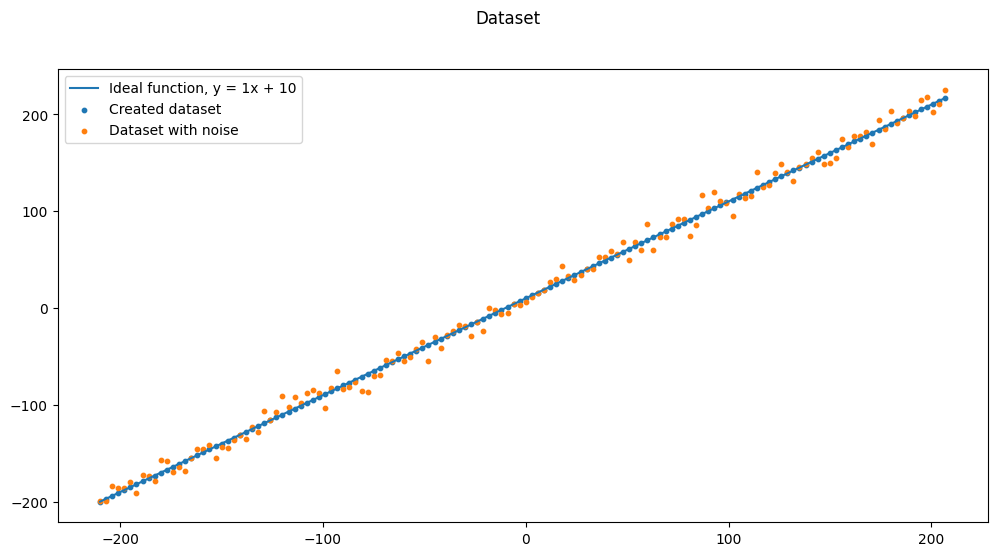

In [271]:
X = np.arange(-210, 210, 3) 
y = np.arange(-200, 220, 3)

rng = default_rng()
y_noisy = y + 8*rng.standard_normal(len(y))

model = LinearRegression()
model.fit(X.reshape(-1,1), y)
y_iedal_a = model.coef_[0] 
y_iedal_b = model.intercept_
print(f"intercept: {y_iedal_a}")
print(f"slope: {y_iedal_b}")

y_iedal = model.predict(X.reshape(-1,1))


plt.figure(figsize = (12,6), dpi=100)
plt.scatter(X, y, label = 'Created dataset', s=10)
plt.scatter(X, y_noisy, label = 'Dataset with noise', s=10)
plt.plot(X, y_iedal, label = f'Ideal function, y = {y_iedal_a:.0f}x + {y_iedal_b:.0f}')
plt.suptitle("Dataset")
plt.legend()
plt.show()

## Splitting the dataset

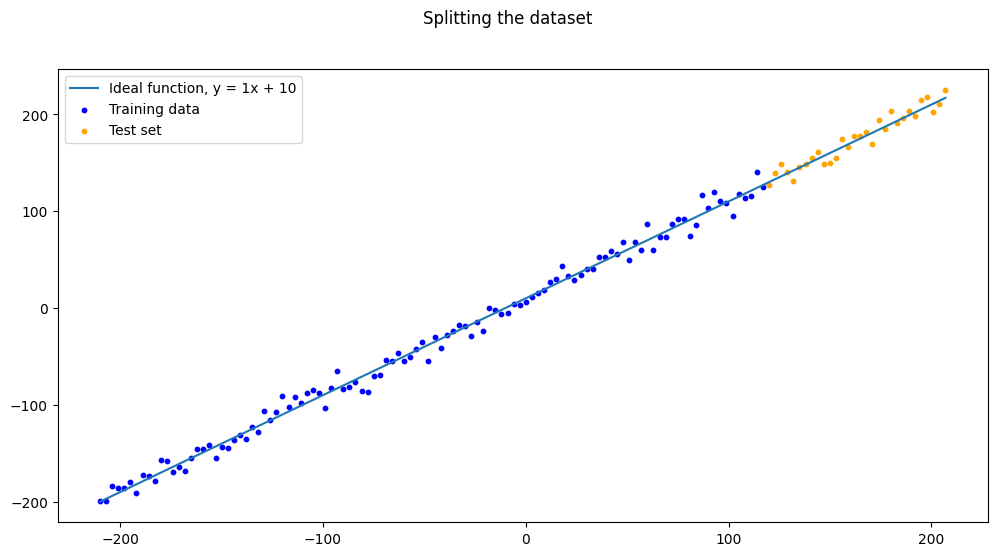

In [272]:
# Splitting training and test data
X_train = X[:110]
y_train = y_noisy[:110]
X_test = X[110:]
y_test = y_noisy[110:]

plt.figure( figsize = (12,6), dpi=100)
plt.suptitle("Splitting the dataset")
plt.scatter(X_train, y_train, c='b', label = 'Training data', s=10)
plt.scatter(X_test, y_test, c='orange', label='Test set', s=10)
plt.plot(X, y_iedal, label = f'Ideal function, y = {y_iedal_a:.0f}x + {y_iedal_b:.0f}')
plt.legend()
plt.show()

## TensorFlow Regression model with SGD optimiser

In [273]:
# creating model and dense layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=1),
    tf.keras.layers.Dense(1)])

In [274]:
# compiling the neural network model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),#SGD-> stochastic gradient descent
              metrics = ['mae'])

In [275]:
# tensorflow run model/train model on input data
sgd_e10_history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 119.7518 - mae: 119.7518
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 39.9315 - mae: 39.9315
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 33.0027 - mae: 33.0027
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 32.3998 - mae: 32.3998
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 31.2870 - mae: 31.2870
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 38.6915 - mae: 38.6915
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 37.9652 - mae: 37.9652
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 39.5655 - mae: 39.5655
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 40.0285 - mae: 40.0285
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 42.0419 - mae: 42.0419


In [276]:
# Prediction of neural network model
sgd_e10_res = model.predict(X_test)
sgd_e10_r2_score = r2_score(y_test, sgd_e10_res)
sgd_e10_a = float(model.layers[0].get_weights()[0])
sgd_e10_b = float(model.layers[0].get_weights()[1])
print(f"y = {sgd_e10_a:.3}x + ({sgd_e10_b:.3}), R^2 = {sgd_e10_r2_score:.3}")

print('R score is :', r2_score(y_test, sgd_e10_res))

1/1 [==============================] - 0s 52ms/step
y = 0.322x + (0.0763), R^2 = -19.3
R score is : -19.31369041808001


### Evaluating the model

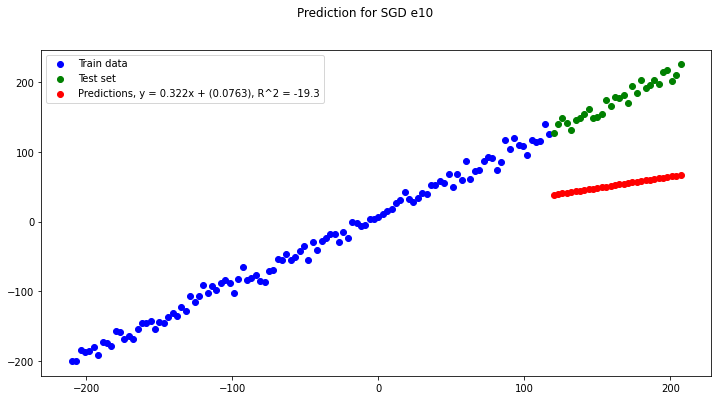

In [277]:
# size of the plot
plt.figure(figsize=(12,6))
plt.suptitle("Prediction for SGD e10")
plt.scatter(X_train, y_train, c="b", label="Train data")
plt.scatter(X_test, y_test, c="g", label="Test set")
plt.scatter(X_test, sgd_e10_res, c="r", label=f"Predictions, y = {sgd_e10_a:.3}x + ({sgd_e10_b:.3}), R^2 = {sgd_e10_r2_score:.3}")
plt.legend()
plt.show()

### Increasing the epochs value

In [278]:
# tensorflow run model/train model
sgd_e100_history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 43.0097 - mae: 43.0097
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 38.2550 - mae: 38.2550
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 38.0802 - mae: 38.0802
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 38.5881 - mae: 38.5881
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 41.6025 - mae: 41.6025
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 38.8770 - mae: 38.8770
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 36.4220 - mae: 36.4220
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 40.1341 - mae: 40.1341
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 36.6995 - mae: 36.6995
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 36.0244 - mae: 36.0244
Epoch 11/100
4/4 [==============================] - 0s 3ms/

In [279]:
# Predictions
sgd_e100_res = model.predict(X_test)
sgd_e100_r2_score = r2_score(y_test, sgd_e100_res)
sgd_e100_a = float(model.layers[0].get_weights()[0])
sgd_e100_b = float(model.layers[0].get_weights()[1])
print(f"y = {sgd_e100_a:.3}x + ({sgd_e100_b:.3}), R^2 = {sgd_e100_r2_score:.3}")


1/1 [==============================] - 0s 15ms/step
y = 1.58x + (0.862), R^2 = -8.99


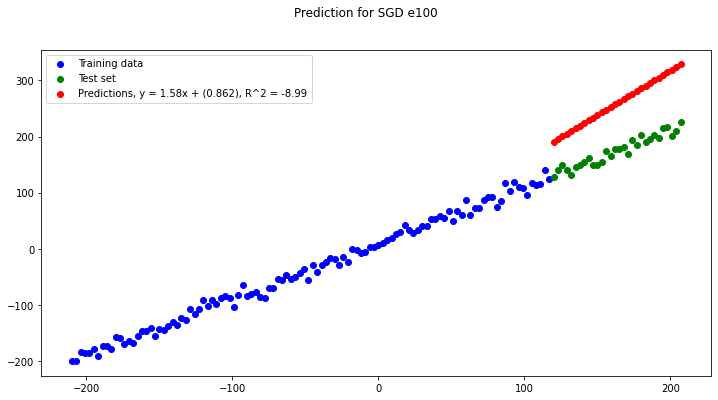

In [280]:
# size of the plot
plt.figure(figsize=(12,6))
plt.suptitle("Prediction for SGD e100")
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test set")
plt.scatter(X_test, sgd_e100_res, c="r", label=f"Predictions, y = {sgd_e100_a:.3}x + ({sgd_e100_b:.3}), R^2 = {sgd_e100_r2_score:.3}")
plt.legend()
plt.show()

In [281]:
# creating model and dense layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=1),
    tf.keras.layers.Dense(1)])

In [282]:
# compiling the neural network model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),#SGD-> stochastic gradient descent
              metrics = ['mae'])

In [283]:
# tensorflow run model/train model on input data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 122.8671 - mae: 122.8671
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 38.1820 - mae: 38.1820
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 40.6980 - mae: 40.6980
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 37.9091 - mae: 37.9091
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 14.2461 - mae: 14.2461
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 36.0638 - mae: 36.0638
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 34.8486 - mae: 34.8486
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 41.6017 - mae: 41.6017
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 37.3510 - mae: 37.3510
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 39.3499 - mae: 39.3499


## TensorFlow Regression model with Adam optimiser

In [284]:
# creating model and dense layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=1),
    tf.keras.layers.Dense(1)])

In [285]:
# compiling the neural network model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ['mae']) # Mean Absolute Error

In [286]:
# tensorflow run model/train model on input data
adam_e10_history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 192.5112 - mae: 192.5112
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 157.9369 - mae: 157.9369
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 122.4309 - mae: 122.4309
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 87.0063 - mae: 87.0063
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 51.3136 - mae: 51.3136
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 18.5841 - mae: 18.5841
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 18.6173 - mae: 18.6173
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 25.9591 - mae: 25.9591
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 22.4019 - mae: 22.4019
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 13.3997 - mae: 13.3997


### Evaluating the model

In [287]:
# Predictions
adam_e10_res = model.predict(X_test)
adam_e10_r2_score = r2_score(y_test, sgd_e100_res)
adam_e10_a = float(model.layers[0].get_weights()[0])
adam_e10_b = float(model.layers[0].get_weights()[1])
print(f"y = {adam_e10_a:.3}x + ({adam_e10_b:.3}), R^2 = {adam_e10_r2_score:.3}")

# Evaluating the model
print('R score is :', r2_score(y_test, adam_e10_res))

1/1 [==============================] - 0s 37ms/step
y = 0.905x + (-0.571), R^2 = -8.99
R score is : -0.06492954498456194


In [288]:
# size of the plot
plt.figure(figsize=(12,6))
plt.suptitle("Prediction for adam e10")
plt.scatter(X_train, y_train, c="b", label="Train data")
plt.scatter(X_test, y_test, c="g", label="Test set")
plt.scatter(X_test, adam_e10_res, c="r", label=f"Predictions, y = {adam_e10_a:.3}x + ({adam_e10_b:.3}), R^2 = {adam_e10_r2_score:.3}")
plt.legend()
plt.show()

### Increasing the epochs value

In [289]:
# tensorflow run model/train model
adam_e100_history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 13.0779 - mae: 13.0779
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 15.0321 - mae: 15.0321
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 10.5681 - mae: 10.5681
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 12.0919 - mae: 12.0919
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 10.4979 - mae: 10.4979
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 9.6121 - mae: 9.6121
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 9.9715 - mae: 9.9715
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 8.9459 - mae: 8.9459
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 9.0864 - mae: 9.0864
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 8.7606 - mae: 8.7606
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - los

In [290]:
# Predictions
adam_e100_res = model.predict(X_test)
adam_e100_r2_score = r2_score(y_test, sgd_e100_res)
adam_e100_a = float(model.layers[0].get_weights()[0])
adam_e100_b = float(model.layers[0].get_weights()[1])
print(f"y = {adam_e100_a:.3}x + ({adam_e100_b:.3}), R^2 = {adam_e100_r2_score:.3}")

1/1 [==============================] - 0s 25ms/step
y = 0.988x + (10.3), R^2 = -8.99


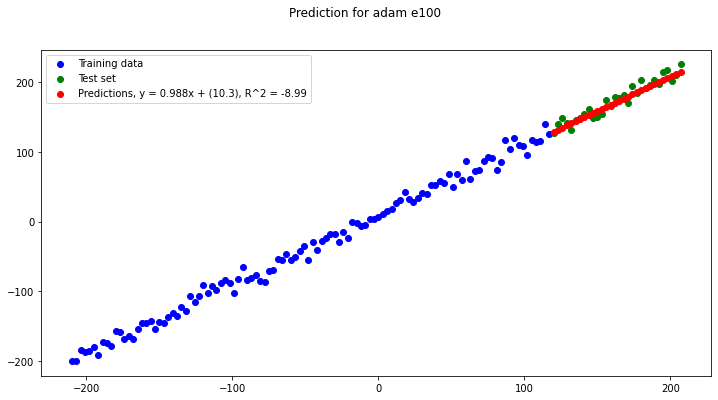

In [291]:
# size of the plot
plt.figure(figsize=(12,6))
plt.suptitle("Prediction for adam e100")
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test set")
plt.scatter(X_test, adam_e100_res, c="r", label=f"Predictions, y = {adam_e100_a:.3}x + ({adam_e100_b:.3}), R^2 = {adam_e100_r2_score:.3}")
plt.legend()
plt.show()

## Summary

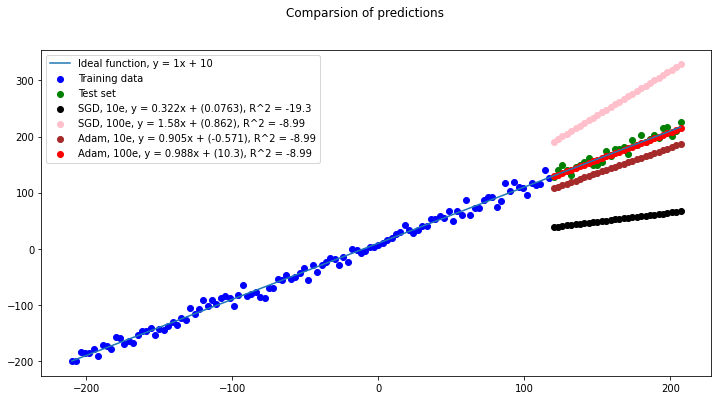

In [292]:
plt.figure(figsize=(12,6))
plt.suptitle("Comparsion of predictions")
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test set")
plt.scatter(X_test, sgd_e10_res, c="black", label=f"SGD, 10e, y = {sgd_e10_a:.3}x + ({sgd_e10_b:.3}), R^2 = {sgd_e10_r2_score:.3}")
plt.scatter(X_test, sgd_e100_res, c="pink", label=f"SGD, 100e, y = {sgd_e100_a:.3}x + ({sgd_e100_b:.3}), R^2 = {sgd_e100_r2_score:.3}")
plt.scatter(X_test, adam_e10_res, c="brown", label=f"Adam, 10e, y = {adam_e10_a:.3}x + ({adam_e10_b:.3}), R^2 = {adam_e10_r2_score:.3}")
plt.scatter(X_test, adam_e100_res, c="red", label=f"Adam, 100e, y = {adam_e100_a:.3}x + ({adam_e100_b:.3}), R^2 = {adam_e100_r2_score:.3}")
plt.plot(X, y_iedal, label = f'Ideal function, y = {y_iedal_a:.0f}x + {y_iedal_b:.0f}')
plt.legend()
plt.show()

[119.75184631347656, 39.9315071105957, 33.002716064453125, 32.39984130859375, 31.286962509155273, 38.691505432128906, 37.9651985168457, 39.56550598144531, 40.028465270996094, 42.041934967041016]


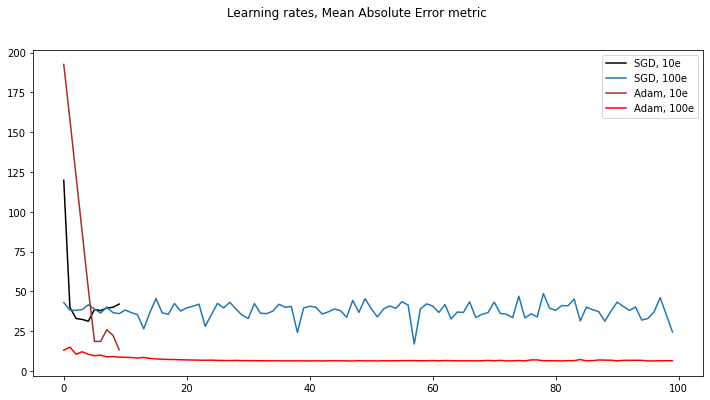

In [293]:
plt.figure(figsize=(12,6))
plt.suptitle("Learning rates, Mean Absolute Error metric")
print(sgd_e10_history.history['mae'])
plt.plot(sgd_e10_history.history['mae'], c="black", label="SGD, 10e")
plt.plot(sgd_e100_history.history['mae'], label="SGD, 100e")
plt.plot(adam_e10_history.history['mae'], c="brown", label="Adam, 10e")
plt.plot(adam_e100_history.history['mae'], c="red", label="Adam, 100e")
plt.legend()
plt.show()